In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
import scipy.ndimage as scind
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize
import matplotlib.colorbar as clb
import function_plot as f_plt

In [3]:
work_dir=os.getenv('HOME')+'/Desktop/TESI/models/Sandage_varZ_v4.2eq_CB16MILES_ChFall/'
f_name=work_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001.fits'
f_par=work_dir+'sandage_varZ_v4.2eq_spec_dcomb0p25null_001_physpar_wagef.fits'


In [4]:
hdul=fits.open(f_name)
hdul_par=fits.open(f_par)

y_data=hdul[1].data

wl=hdul[0].data
sel_wl=(wl<8500) & (wl>3500)

wl=wl[sel_wl]
y_data=y_data[...,sel_wl]


In [5]:
age10=np.log10(hdul_par[1].data['age10'])
age90=np.log10(hdul_par[1].data['age90'])
age50=np.log10(hdul_par[1].data['age50'])
dage_n=(age10-age90)/age50

In [6]:
sel_norm=(wl<5550)&(wl>5450)
wl_norm=wl[sel_norm]
norm=np.mean(y_data[...,sel_norm], axis=1)

In [7]:
y_data_norm=np.transpose(y_data)/norm
y_data=np.transpose(y_data_norm)

In [8]:
delta_new=(y_data-y_data[idx_ref, ...])/np.std(y_data, axis=0)

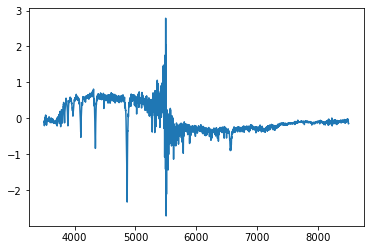

In [9]:
plt.plot(wl, delta_new[12006])

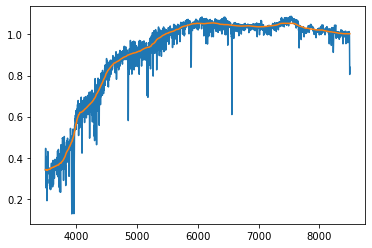

In [10]:
plt.plot(wl, y_data[idx_ref, ...])
plt.plot(wl, scind.median_filter(y_data[idx_ref, ...], size=500))

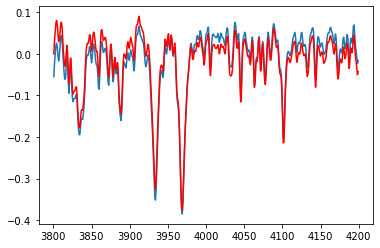

In [11]:
sel_wl1=np.logical_and(wl<4200, wl>3800)
plt.plot(wl[sel_wl1], y_data[idx_ref, sel_wl1]-scind.median_filter(y_data[idx_ref, sel_wl1], size=500))
plt.plot(wl[sel_wl1], y_data[idx_ref, sel_wl1]-scind.median_filter(y_data[idx_ref, sel_wl1], size=100), color='red')

In [12]:
np.shape(y_data)

(12500, 5462)

In [13]:
np.shape(dage_n)

(12500,)

In [14]:
age50

array([9.674204 , 9.125134 , 9.154695 , ..., 9.029608 , 8.510696 ,
       9.5994215], dtype=float32)

In [25]:
i_sel=(age50<9.1) & (age50>9.0)
np.shape(i_sel)
idx_ref=np.argmin(dage_n[i_sel])


In [29]:
indexes=np.arange(12500)[i_sel]
indexes

array([   96,   132,   167,   172,   221,   255,   274,   290,   309,
         314,   379,   380,   389,   412,   415,   432,   446,   457,
         466,   518,   577,   588,   613,   690,   720,   729,   778,
         864,   866,   895,   896,   901,   918,   938,   971,   973,
         974,  1002,  1009,  1012,  1064,  1088,  1135,  1162,  1190,
        1211,  1246,  1257,  1264,  1270,  1284,  1308,  1310,  1332,
        1352,  1361,  1479,  1534,  1575,  1577,  1581,  1598,  1626,
        1705,  1706,  1710,  1715,  1833,  1842,  1855,  1920,  1930,
        1973,  2055,  2059,  2105,  2116,  2140,  2141,  2224,  2229,
        2295,  2323,  2351,  2359,  2384,  2402,  2403,  2531,  2631,
        2641,  2678,  2694,  2718,  2749,  2760,  2772,  2787,  2805,
        2847,  2851,  2869,  2880,  2887,  2891,  2944,  3033,  3074,
        3093,  3116,  3124,  3130,  3144,  3230,  3241,  3305,  3335,
        3400,  3450,  3452,  3502,  3506,  3512,  3524,  3538,  3561,
        3589,  3671,

Text(0, 0.5, '$log_{10}(\\Delta age_{n})$')

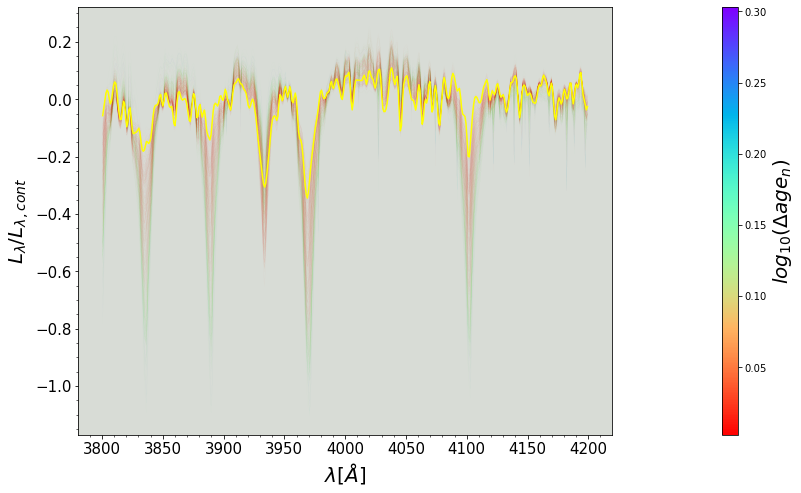

In [30]:
cm2inch = 1/2.54
widths=[5,0.15]
heights=[1,1]
indexes=np.arange(12500)[i_sel]

#gs=dict(width_ratios=widths, height_ratios=heights)
cm2inch = 1/2.54 
fig = plt.figure(figsize=(30*cm2inch,20*cm2inch))
#gs = fig.add_gridspec(2, 2, height_ratios=heights, width_ratios=widths, hspace=0.2, wspace=0.3)
gs = fig.add_gridspec(2, 2, height_ratios=heights, width_ratios=widths, hspace=0.2, wspace=0.4)

ax1 = fig.add_subplot(gs[:, 0])
ax3 = fig.add_subplot(gs[:, 1])
#ax1.plot(wl[sel_wl1], y_data[100, sel_wl1]-scind.median_filter(y_data[100, sel_wl1], size=500), alpha = 0.1,linewidth = 0.05)

for i_model in range(0,12500):
    if(i_sel[i_model]):
        c=cm.rainbow_r((dage_n[i_model]-np.min(dage_n))/(np.max(dage_n)-np.min(dage_n)))
        ax1.plot(wl[sel_wl1], y_data[i_model, sel_wl1]-scind.median_filter(y_data[i_model, sel_wl1], size=500), alpha = 0.1,linewidth = 0.05, c=c)


ax1.plot(wl[sel_wl1], y_data[indexes[idx_ref], sel_wl1]-scind.median_filter(y_data[indexes[idx_ref], sel_wl1], size=500), color='yellow')

NORM=Normalize(vmin=np.min(dage_n), vmax=np.max(dage_n))
clb.ColorbarBase(ax3, cmap=cm.rainbow_r, norm=NORM)
ax1.set_facecolor('#d8dcd6')
ax1.tick_params(labelsize=15)
ax3.tick_params(labelsize=10)
ax1.minorticks_on()

ax1.set_xlabel(r'$\lambda [\AA]$', size=20)
ax1.set_ylabel(r'$L_{\lambda}/L_{\lambda,cont}$', size=20)
ax3.set_ylabel(r'$log_{10}(\Delta age_{n})$', size=20)

In [ ]:
#/export/home/extragal/zibetti/no_ownCloud/SteMaGE/data/SEDlibraries/Sandage_v4.1_Zfix_noburst_cb16MILES_1M ....... tabella su plutone dove ci sono gli spettri :)